In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tkinter import E

# import Data miners 2022 (answers).csv from the same directory as this file and create a dataframe called df
df = pd.read_csv('Data miners 2022 (answers).csv')

#change Your height (in International inches)\nAlready, an awkward data storage format. It's good to be fluent in multiple systems! to height
df = df.rename(columns={'Your height (in International inches)\nAlready, an awkward data storage format. It\'s good to be fluent in multiple systems!':'height'})
#change Your mean shoe size (In European Continental system)	to shoe_size
df = df.rename(columns={'Your mean shoe size (In European Continental system)':'shoe_size'})

# Assign all points to class 0
df['class'] = 0

#remove all columns but shoe_size, height, and class
df = df[['shoe_size', 'height', 'class']]

#remove observations that are 3 standard deviations from the mean
df = df[(np.abs(df.height-df.height.mean()) <= (3*df.height.std())) & (np.abs(df.shoe_size-df.shoe_size.mean()) <= (3*df.shoe_size.std()))]

#normalize the data
df['height'] = df['height'] / max(df['height']) 
df['shoe_size'] = df['shoe_size'] / max(df['shoe_size']) 



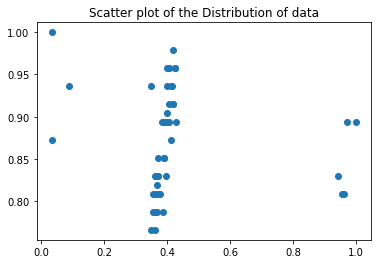

,shoe_size,height,class
0,1.000000,0.035028,0
1,0.829787,0.943503,0
2,0.893617,0.384181,0
3,0.808511,0.375706,0
4,0.851064,0.371412,0
5,0.893617,0.429379,0
6,0.936170,0.400565,0
8,0.893617,0.400000,0
9,0.851064,0.389831,0
10,0.872340,0.033898,0


In [162]:
plt.title('Scatter plot of the Distribution of data')
plt.scatter(df['height'],df['shoe_size']) # Visualizing the distribution
plt.show()

display(df)

In [163]:
def initializeMeans(df):

    """
    Intialize the means by randomly taking two points from the dataframe. Hint: check the function 'random.randint'
    return two pandas dataframes (or pandas series) with mean1 and mean2
    """

    # Randomly initialize the means
    mean1 = df.iloc[random.randint(0,len(df)-1)]
    mean2 = df.iloc[random.randint(0,len(df)-1)]
    mean3 = df.iloc[random.randint(0,len(df)-1)]

    return mean1, mean2, mean3

In [164]:

def euclideanDist(df,pointIDX,mean1,mean2, mean3):

    # Calculate the euclidean distance between the point and the two means
    dist1 = np.sqrt((df.iloc[pointIDX]['shoe_size'] - mean1['shoe_size'])**2 + (df.iloc[pointIDX]['height'] - mean1['height'])**2)
    dist2 = np.sqrt((df.iloc[pointIDX]['shoe_size'] - mean2['shoe_size'])**2 + (df.iloc[pointIDX]['height'] - mean2['height'])**2)
    dist3 = np.sqrt((df.iloc[pointIDX]['shoe_size'] - mean2['shoe_size'])**2 + (df.iloc[pointIDX]['height'] - mean3['height'])**2)
    


    # Assign the point to the mean with the smallest distance
    if dist1 < dist2 and dist1 < dist3:
        df['class'][pointIDX] = 1
    elif dist2 < dist1 and dist2 < dist3:
        df['class'][pointIDX] = 2
    else:
        df['class'][pointIDX] = 3
    
    return df


m1, m2, m3 = initializeMeans(df)
b = euclideanDist(df, 5, m1,m2,m3)

/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2


In [165]:
def updateMean(df):
    """
    df is the dataframe of points containing the assigned classes
    return updated mean1 and mean2 based on the value in column 'class'. mean1 and mean2 should still be pandas dataframes (or pandas series)
    """
    mean1 = df.loc[df['class']==1].mean()
    mean2 = df.loc[df['class']==2].mean()
    mean3 = df.loc[df['class']==3].mean()
    
    return mean1, mean2, mean3

/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Iteration 0/0


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 3


Iteration 1/1


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 3
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Iteration 2/2


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 3
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Iteration 3/3


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 3
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Iteration 4/4


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 3
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Iteration 5/5


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 3
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Iteration 6/6


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 3
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Iteration 7/7


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 3
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Iteration 8/8


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 3
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 1
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

Iteration 9/9


/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 2
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][pointIDX] = 3
/var/folders/jt/qjvfxd317_s79391s2jnf0w40000gn/T/ipykernel_8019/1821883783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[

<Figure size 432x288 with 0 Axes>

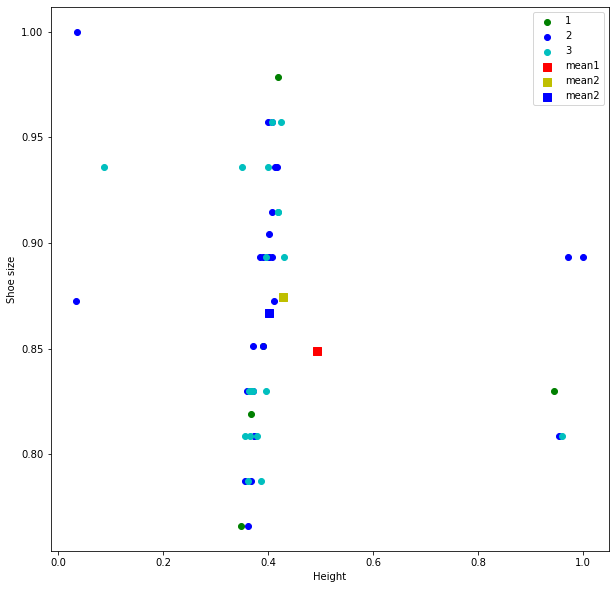

In [166]:
def Kmeans(df,iterations):
    """
    When you have implemented the three functions this function should work and run the Kmeans algorithm!
    """

    mean1, mean2, mean3 = initializeMeans(df)

    for iteration in range(iterations):

        print("Iteration {}/{}".format(iteration,iteration))
        
        for i in range(len(df)):
            df = euclideanDist(df,i,mean1,mean2, mean3)
            
        mean1, mean2, mean3 = updateMean(df)

    return df, mean1, mean2, mean3

df, mean1, mean2, mean3 = Kmeans(df,10)

#What K-means does is to assign each point to a cluster based on the distance between the point and the mean of the cluster.
#The mean of the cluster is then updated based on the points assigned to the cluster.
#This process is repeated until the means converge.


# plt.clf()
# #Scatter each point with a color corresponding to the class
# plt.scatter(dfkk.loc[dfkk['class'] == 0]['Shoe size'],dfkk.loc[dfkk['class'] == 0]['Height'],color='g',label='0')  
# plt.scatter(dfkk.loc[dfkk['class'] == 1]['Shoe size'],dfkk.loc[dfkk['class'] == 1]['Height'],color='b',label='1')  
# plt.scatter(dfkk.loc[dfkk['class'] == 2]['Shoe size'],dfkk.loc[dfkk['class'] == 2]['Height'],color='m',label='2')
# #Scatter each mean
# plt.scatter(means.iloc[0].loc['Shoe size'],means.iloc[0].loc['Height'],s=70,label='mean0',marker='s',color='r')                    # Visualizing the final class distribution
# plt.scatter(means.iloc[1].loc['Shoe size'],means.iloc[1].loc['Height'],s=70,label='mean1',marker='s',color='y')
# plt.scatter(means.iloc[2].loc['Shoe size'],means.iloc[2].loc['Height'],s=70,label='mean2',marker='s',color='b')
# #Label stuff
# plt.xlabel('Shoe size')
# plt.ylabel('Height')
# plt.legend()
# plt.show()



plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(df.loc[df['class'] == 1]['height'],df.loc[df['class'] == 1]['shoe_size'],color='g',label='1')  #
plt.scatter(df.loc[df['class'] == 2]['height'],df.loc[df['class'] == 2]['shoe_size'],color='b',label='2')  #
plt.scatter(df.loc[df['class'] == 3]['height'],df.loc[df['class'] == 3]['shoe_size'],color='c',label='3')  #




plt.scatter(mean1['height'],mean1['shoe_size'],s=70,label='mean1',marker='s',color='r')                    # Visualizing the final class distribution
plt.scatter(mean2['height'],mean2['shoe_size'],s=70,label='mean2',marker='s',color='y') 
plt.scatter(mean3['height'],mean3['shoe_size'],s=70,label='mean2',marker='s',color='b')   


plt.xlabel('Height')
plt.ylabel('Shoe size')

plt.legend()                                                                                                #
plt.show()

